<a href="https://colab.research.google.com/github/AstiaSun/deep-learning-practices/blob/master/practise7/cnn_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this tutorial we will create a simple CNN which will classify the images from mnist dataset. We will use neurol network API called [Keras](https://keras.io), which is one of the most popular libraries for neurol network processing in Python.
You can run this notebook in [Google Colab](https://colab.research.google.com).

Now let't import the Python library and load mnist dataset, which has been used in previous tutorials.



In [2]:
import keras

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Let's see what our loaded data consists of.
We will show one of the images from dataset.

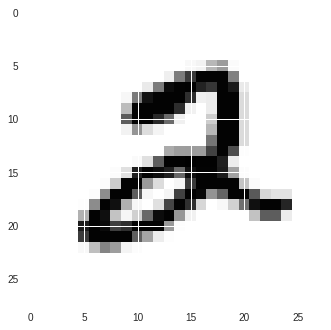

In [4]:
# show one of the images from dataset
import matplotlib.pyplot as ptl
ptl.imshow(x_train[5])
ptl.show()

The dataset consists of the images with extension 28x28.

First of all, we will configure keras beckend and initialize the train and test tensors.
Also we will normilize all elements in this tensor by dividing them on 255.

In [0]:
import keras.backend as K
# different channels may be used - this mode add the '1' to the end
K.image_data_format()
# reshape data
N_train = x_train.shape[0]
N_test = x_test.shape[0]
rows = 28
cols = 28
x_train = x_train.reshape(N_train, rows, cols, 1) / 255
x_test = x_test.reshape(N_test, rows, cols, 1) / 255

Secondly, we will create vectors of labels for training. We will use to_categorical function to create a binary matrix with these vectors. The first parameter is a vector of labels, the second is total amount of classes in vector.

In [0]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Now we are ready to program a first model. It will be a simple 2-layer neural network we have worked previously. However now we need only 2 lines of code to create this layers. The schema of a network is below.

![Fully conneted 2-layer network](https://github.com/AstiaSun/deep-learning-practices/blob/master/practise7/fully_connected_net_1.png)

In [0]:
model = keras.models.Sequential()

In [0]:
from keras.layers import Dense, Flatten

Flatten layer flatten the input. For instance, if inout tersor is 8x8x64, then the output will a vector with 4096 elements.

Dense layer implements the activation operation. In example below the first arguments is a number of classes (respectively to amount of classes in the vector with labels). The second parameter is an activation function to use.

In [0]:
input_shape = (raws, cols, 1)
model.add(Flatten(input_shape=input_shape))
model.add(Dense(10, activation="softmax"))

After we have described the model, let's compile it. That's mean that the model will be configured. Optimizer, the first parameter, is an algorithm which will be used for finding the minimum. Metrics are the list of monitored metrix during the training.

In [0]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

Finally by calling function fit the model will be trained. Here we specify the size of each batch, amount of epochs and train set.

Next, the test set will we used to determine a value of error.  

In [18]:
model.fit(x_train, y_train_cat, batch_size=128, epochs=10)
score = model.evaluate(x_test, y_test_cat)
print("Accuracy =", score)

Epoch 1/10
60000/60000 [==============================] - 4s 67us/step - loss: 2.2644 - acc: 0.4292
Epoch 2/10
60000/60000 [==============================] - 2s 40us/step - loss: 2.1900 - acc: 0.5875
Epoch 3/10
60000/60000 [==============================] - 2s 40us/step - loss: 2.1186 - acc: 0.6649
Epoch 4/10
60000/60000 [==============================] - 2s 41us/step - loss: 2.0499 - acc: 0.6837
Epoch 5/10
60000/60000 [==============================] - 2s 40us/step - loss: 1.9838 - acc: 0.7061
Epoch 6/10
60000/60000 [==============================] - 2s 41us/step - loss: 1.9201 - acc: 0.7270
Epoch 7/10
60000/60000 [==============================] - 2s 40us/step - loss: 1.8587 - acc: 0.7330
Epoch 8/10
60000/60000 [==============================] - 2s 40us/step - loss: 1.7998 - acc: 0.7457
Epoch 9/10
60000/60000 [==============================] - 2s 40us/step - loss: 1.7432 - acc: 0.7530
Epoch 10/10
10000/10000 [==============================] - 1s 69us/step
Accuracy = [1.65073473052978

As you can see, the accuracy of neural network is about 78%. Now let's see how the accuracy will change if we will add a layer with [RELU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) as an acctivation function. 

The digram of a network:

![Fully connected 3-layer network](https://github.com/AstiaSun/deep-learning-practices/blob/master/practise7/fully_connected_net_2.png)


In [19]:
# now add new layer with RELU usage
input_shape = (raws, cols, 1)
model_relu = keras.models.Sequential()
model_relu.add(Flatten(input_shape=input_shape))
model_relu.add(Dense(100, activation="relu"))
model_relu.add(Dense(10, activation="softmax"))
model_relu.compile(optimizer=keras.optimizers.Adam(lr=0.0008), 
                   loss=keras.losses.categorical_crossentropy, 
                   metrics=['accuracy'])
model_relu.fit(x_train, y_train_cat, batch_size=128, epochs=10)
score = model_relu.evaluate(x_test, y_test_cat)
print("Accuracy =", score)

Epoch 1/10
60000/60000 [==============================] - 3s 49us/step - loss: 1.9545 - acc: 0.5466
Epoch 2/10
60000/60000 [==============================] - 3s 46us/step - loss: 1.1197 - acc: 0.7556
Epoch 3/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.7531 - acc: 0.8237
Epoch 4/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.5868 - acc: 0.8561
Epoch 5/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.4962 - acc: 0.8733
Epoch 6/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.4405 - acc: 0.8844
Epoch 7/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.4036 - acc: 0.8914
Epoch 8/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3775 - acc: 0.8963
Epoch 9/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3585 - acc: 0.9004
Epoch 10/10
10000/10000 [==============================] - 1s 73us/step
Accuracy = [0.32810648040771

As you can see, the performance has increased to 90% with adding just one layer.
But this is still not enough. Fully connected networks, which we have used previously, have a number of flaws:

*   Spatial shape of an image is not taked into account
*   Number of coeficients even in simple models is anormous
*   We want to gain translation invariance (position change of object on the image do not impact the result) 
*   New data is not well generalized in fully connected networks

The solution is to use [**convolutional neural networks (CNNs)**](https://en.wikipedia.org/wiki/Convolutional_neural_network). They cosists of a convolutional layer, an non-linear activation function, pooling layers, fully connected layers and softmax.


At this momemt we will see how multilayer CNN wins in accuracy. The diagram shows the architecture of our network:

![CNN schema which is going to be implemented](https://github.com/AstiaSun/deep-learning-practices/blob/master/practise7/cnn_practice_7.png)


Two new types of layers has appeared. The first one (Conv2D) is a convolutional layer with RELU activation. The second one is a pooling layer (MaxPool2D).

In [0]:
from keras.layers import Conv2D, MaxPool2D
input_shape = (raws, cols, 1)
model = keras.models.Sequential()
# add convolutional kernel as the 1st layer with next parameters:
# 32 - depth of a tenzor
# kernel_zise - the size of a subset for which the filter will be used
# padding - means that the output has the same length as the original input
# input_shape - shape of an image
# activation function - we are using RELU as activation function
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', 
                 input_shape=input_shape, activation='relu'))
# by default pool sixe is 2X2
model.add(MaxPool2D())
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', 
                 input_shape=input_shape, activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', 
                 input_shape=input_shape, activation='relu'))
model.add(MaxPool2D(7, 7))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))
model.compile(optimizer=keras.optimizers.Adam(lr=0.0008), 
              loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

In [31]:
model.fit(x_train, y_train_cat, batch_size=128, epochs=10)
score = model.evaluate(x_test, y_test_cat)
print("Accuracy =", score)

Epoch 1/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.3155 - acc: 0.9139
Epoch 2/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0764 - acc: 0.9766
Epoch 3/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0541 - acc: 0.9827
Epoch 4/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0431 - acc: 0.9867
Epoch 5/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.0342 - acc: 0.9897
Epoch 6/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.0288 - acc: 0.9910
Epoch 7/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.0253 - acc: 0.9916
Epoch 8/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.0227 - acc: 0.9929
Epoch 9/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.0168 - acc: 0.9949
Epoch 10/10
10000/10000 [==============================] - 1s 108us/step
Accuracy = [0.0434

Finally, you can see that we have gained the accuracy of approximately 98.5%.
However, this is a great result, it is still not enough. In next practises we are going to see which architectures of CNN can improve a performance.

To show the detailes of a trained model, you can call a function summary().
It shows dimentions of each layer and amount of params it has received.

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 128)               0         
__________

In [34]:
# save results to google drive
from google.colab import drive
drive.mount("/content/deep-learning-practices/")

# show model in json format
json = model.to_json()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/deep-learning-practices/
